<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2264/Inferential_Statistics_NGC_2264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import and Examine the test sets

In [2]:
#import relevent packages and libraries
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})

In [3]:
central_region = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/NGC_2264/NGC_2264_test_set_2.2.csv')
lower_region = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/NGC_2264/NGC_2264_test_set_3.2.csv')

In [4]:
ngc_2264 = pd.concat([central_region.assign(region = 'central'), lower_region.assign(region = 'lower')])
ngc_2264.head()

,col1,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2264_center,PMemb,region
0,3,1635721458409799680,b'Gaia DR2 3326740006577519360',3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.16113,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,...,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.968913,2.235852,100.416360,-13.184037,100001.0,9670.667,9200.25,9831.00,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008433,0.008440,0.841,central
1,5,1635721458409799680,b'Gaia DR2 3326740075296996608',3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.85217,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,...,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966781,2.231493,100.411398,-13.184484,100001.0,3608.005,3417.00,4477.88,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010309,0.010361,0.970,central
2,6,1635721458409799680,b'Gaia DR2 3326740002281694592',3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.96730,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,...,10.136516,1.153539,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.972026,2.238207,100.420088,-13.185468,100002.0,8748.333,7420.00,9705.00,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010362,0.010379,0.985,central
3,7,1635721458409799680,b'Gaia DR2 3326740075296996736',3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.38344,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,...,15.966477,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966218,2.230183,100.409948,-13.184684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'

In [5]:
ngc_2264.columns

Index(['col1', 'solution_id', 'designation', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       ...
       'radius_percentile_upper', 'lum_val', 'lum_percentile_lower',
       'lum_percentile_upper', 'datalink_url', 'epoch_photometry_url', 'dist',
       'dist_2264_center', 'PMemb', 'region'],
      dtype='object', length=101)

In [29]:
ngc_2264['log_lum_val'] = np.log(ngc_2264['lum_val'])

In [43]:
ngc_2264.groupby(['region']).pmra.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
central,283.0,-1.775442,0.494330,-3.872328,-2.016607,-1.711330,-1.466776,-0.176533
lower,249.0,-2.214361,0.549343,-4.086947,-2.600919,-2.274315,-1.787814,-0.463119


In [44]:
ngc_2264.groupby(['region']).pmdec.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
central,283.0,-3.776546,0.280450,-4.632816,-3.960945,-3.773039,-3.586761,-3.058496
lower,249.0,-3.827631,0.296108,-4.635584,-4.032756,-3.813895,-3.606871,-2.967913


In [45]:
ngc_2264.groupby(['region']).log_lum_val.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
central,158.0,-0.745551,1.197910,-2.481360,-1.534765,-0.903348,-0.389661,4.735238
lower,138.0,-0.873538,0.939516,-2.254395,-1.622779,-1.142277,-0.329710,2.243774


In [37]:
ngc_2264.loc[ngc_2264.region == 'central', ['pmdec', 'pmra', 'log_lum_val', 'lum_val']].describe()

,pmdec,pmra,log_lum_val,lum_val
count,283.000000,283.000000,158.000000,158.000000
mean,-3.776546,-1.775442,-0.745551,2.393874
std,0.280450,0.494330,1.197910,11.870207
min,-4.632816,-3.872328,-2.481360,0.083629
25%,-3.960945,-2.016607,-1.534765,0.215524
50%,-3.773039,-1.711330,-0.903348,0.405218
75%,-3.586761,-1.466776,-0.389661,0.677341
max,-3.058496,-0.176533,4.735238,113.890510


In [38]:
ngc_2264.loc[ngc_2264.region == 'lower', ['pmdec', 'pmra', 'log_lum_val', 'lum_val']].describe()

,pmdec,pmra,log_lum_val,lum_val
count,249.000000,249.000000,138.000000,138.000000
mean,-3.827631,-2.214361,-0.873538,0.725865
std,0.296108,0.549343,0.939516,1.155282
min,-4.635584,-4.086947,-2.254395,0.104937
25%,-4.032756,-2.600919,-1.622779,0.197350
50%,-3.813895,-2.274315,-1.142277,0.319109
75%,-3.606871,-1.787814,-0.329710,0.719146
max,-2.967913,-0.463119,2.243774,9.428853


#### Confidence Interval

In [8]:
def confidence_interval(sample): #reads a sample dataset
    p = np.mean(sample) #mean
    n = len(sample) #sample size
    p_value = 0.95 #for 95% confidence interval
    SD = np.std(sample, ddof=1) # using (n-1) in denominator  
    t = stats.t.ppf(0.975,n-1)
    SE = SD/(n**0.5) #standard error

    lowbound = p - t*SE 
    highbound = p + t*SE 

    print('95% confidence interval:\n','- ', np.round(p,2),'+- (',np.round(t,2),'x', np.round(SE,2),') \n',"- ", 
          [np.round(lowbound,2), np.round(highbound,2)])

In [9]:
confidence_interval(lower_region.pmra)

95% confidence interval:
 -  -2.21 +- ( 1.97 x 0.03 ) 
 -  [-2.28, -2.15]


In [10]:
confidence_interval(central_region.pmra)

95% confidence interval:
 -  -1.78 +- ( 1.97 x 0.03 ) 
 -  [-1.83, -1.72]


#### Histograms

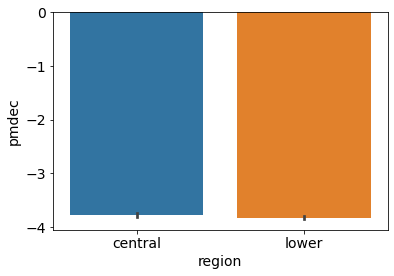

In [14]:
import seaborn as sns
#plt.bar(central_region.pmra, lower_region.pmra], ['central_region','lower_region'])
sns.barplot(x = 'region', y='pmdec', data = ngc_2264, ci= 95)
plt.show()

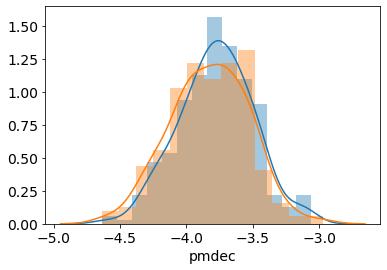

In [15]:
sns.distplot(ngc_2264[ngc_2264['region'] == 'central'].pmdec)
sns.distplot(ngc_2264[ngc_2264['region'] == 'lower'].pmdec)
plt.show()

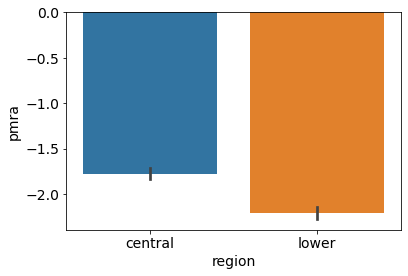

In [17]:
sns.barplot(x = 'region', y='pmra', data = ngc_2264, ci= 95)
plt.show()

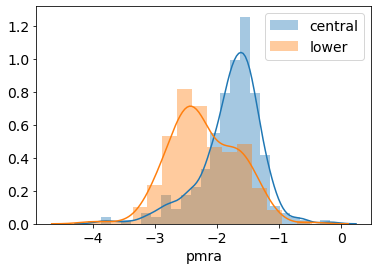

In [18]:
sns.distplot(ngc_2264[ngc_2264['region'] == 'central'].pmra, label = 'central')
sns.distplot(ngc_2264[ngc_2264['region'] == 'lower'].pmra, label = 'lower')
plt.legend()
plt.show()

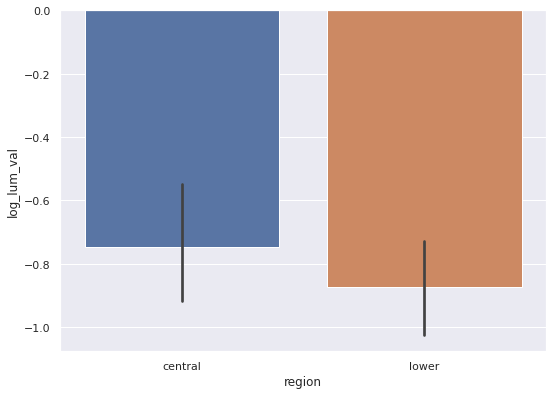

In [42]:
sns.barplot(x = 'region', y='log_lum_val', data = ngc_2264, ci= 95)

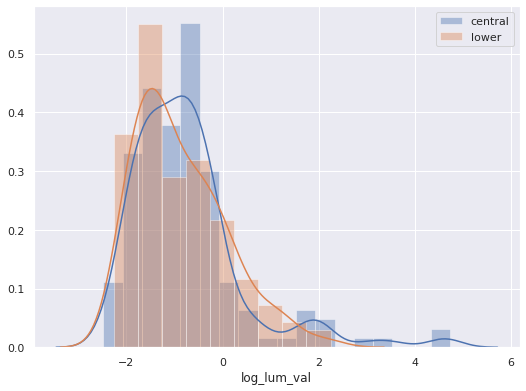

In [46]:
sns.distplot(ngc_2264[ngc_2264['region'] == 'central'].log_lum_val, label = 'central')
sns.distplot(ngc_2264[ngc_2264['region'] == 'lower'].log_lum_val, label = 'lower')
plt.legend()
plt.show()

#### Statistical Significance

In [22]:
def summary_stats(sample): #taking sample dataset
    n = len(sample)
    mean = np.mean(sample)
    sd = np.std(sample, ddof = 1) #bassel's correction
    print('- n =', n)
    print('- Mean =', mean)
    print('- SD =', sd)

pmra of central region
- n = 283
- Mean = -1.7754417800051077
- SD = 0.4943302034075283


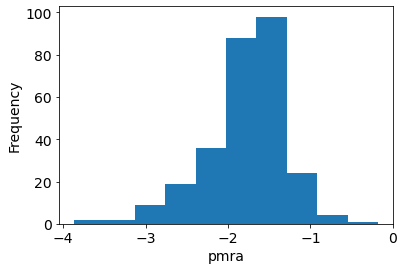

In [23]:
print('pmra of central region')
summary_stats(central_region.pmra)
plt.hist(central_region.pmra)
plt.xlabel('pmra')
plt.ylabel('Frequency')
plt.show()

pmra of lower region
- n = 249
- Mean = -2.2143606714980293
- SD = 0.5493433489781233


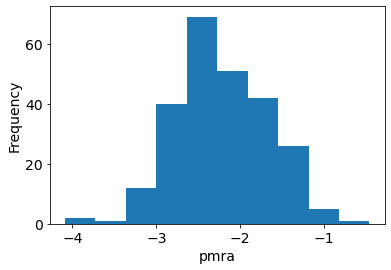

In [24]:
print('pmra of lower region')
summary_stats(lower_region.pmra)
plt.hist(lower_region.pmra)
plt.xlabel('pmra')
plt.ylabel('Frequency')
plt.show()

In [25]:
from scipy import stats 
def difference_of_means_test(data1,data2,tails): #take two dataset and tails
    #sample size
    n1 = len(data1)
    n2 = len(data2)
    
    x1 = np.mean(data1) #mean
    x2 = np.mean(data2)

    s1 = np.std(data1,ddof=1) # using n-1 in denominator
    s2 = np.std(data2,ddof=1) # as we are using sample data

    SE = np.sqrt(s1**2/n1 + s2**2/n2) #using formula
    Tscore = np.abs((x2 - x1))/SE #taking absolute value than take the negetive
    df = min(n1,n2) - 1           #to ensure we take the lowest tail p-value    
    pvalue = tails*stats.t.cdf(-Tscore,df) 

    # practical significance
    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2)) #formula
    Cohensd = (x2 - x1)/SDpooled #using formula
    
    print('T-score =',Tscore)
    print('P-value =',pvalue)
    print("Cohens' d =",Cohensd)

In [26]:
difference_of_means_test(central_region.pmra,lower_region.pmra,2)

T-score = 9.634519751514636
P-value = 7.252021931350007e-19
Cohens' d = -0.842784494217026


In [27]:
difference_of_means_test(central_region.pmdec,lower_region.pmdec,2)

T-score = 2.0352305890839957
P-value = 0.042891081433235896
Cohens' d = -0.17745399873391074


In [40]:
difference_of_means_test(central_region.lum_val,lower_region.lum_val,2)

T-score = 2.3512997949014434
P-value = 0.019491253959257687
Cohens' d = -0.19184568019243484


In [41]:
difference_of_means_test(np.log(central_region.lum_val),np.log(lower_region.lum_val),2)

T-score = 1.3788725668999338
P-value = 0.16917641695152436
Cohens' d = -0.11799405557883333


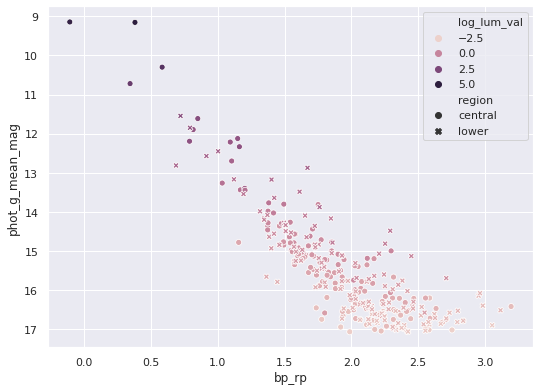

In [30]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=ngc_2264,
                style = 'region', hue = 'log_lum_val')
cmd.invert_yaxis()

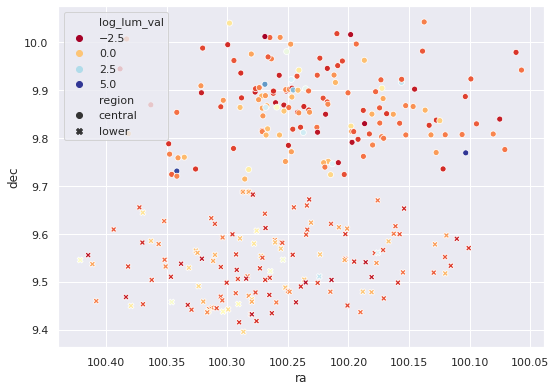

In [31]:
skyplot = sns.scatterplot(x='ra', y='dec', data=ngc_2264,
                hue = 'log_lum_val', style='region', palette = 'RdYlBu')
skyplot.invert_xaxis()